In [39]:
# IMPORT THE LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# LOAD THE DATA

df = pd.read_csv("cac_responses.csv")

#### **EDA**

In [41]:
# RENAME ALL THE COLUMNS 

df.rename(columns = {"Username":"emails"}, inplace = True)
df.rename(columns = {"Student Registration No.":"register_number"}, inplace = True)
df.rename(columns = {"Is it semester-based or trimester-based?":"trimester_semester"}, inplace = True)
df.rename(columns = {"Current Average Marks Percentage":"current_avg_percentage"}, inplace = True)
df.rename(columns = {"how much percentage is your attendance ?":"attendence_percentage"}, inplace = True)
df.rename(columns = {"What time you usually leave the campus?":"time_leaving_campus"}, inplace = True)
df.rename(columns = {"On a scale of 1-10, how would you rate your stress level?":"stress_level"}, inplace = True)
df.rename(columns = {"Major stressors in life (mainly personal, mainly studies or both)":"major_stressors"}, inplace = True)
df.rename(columns = {"Have you ever been diagnosed with any kind of mental health issues?":"past_mental_health_issue"}, inplace = True)
df.rename(columns = {"Are you aware of on campus mental health services? If yes, are you using these resources?":"onCampus_mental_health_services"}, inplace = True)
df.rename(columns = {"What type of accommodation have you availed for?":"type_of_accomodation"}, inplace = True)
df.rename(columns = {"On a scale of 1-5, how satisfied are you with your housing conditions?":"housing_conditions"}, inplace = True)
df.rename(columns = {"On a scale of 1-5, how satisfied are you with the campus facilities and resources?":"campus_resources"}, inplace = True)
df.rename(columns = {"On a scale of 1-5, how satisfied are you with the environment of Lavasa?":"environment_lavasa"}, inplace = True)
df.rename(columns = {"Do you feel the nature and environment of Lavasa is peaceful or depressing?":"peaceful_depressing"}, inplace = True)
df.rename(columns = {"Do you participate in extra-curricular activities? If yes, how much time do you devote to it?":"extracuricular_act"}, inplace = True)
df.rename(columns = {"On an average, how many hours of sleep have you been getting before coming to Lavasa?":"sleep_hours_before_lavasa"}, inplace = True)
df.rename(columns = {"On an average, how many hours of sleep have you been getting after coming to Lavasa?":"sleep_hours_after_lavasa"}, inplace = True)

In [42]:
# PERFORM BASIC EDA

for i in range(len(df["sleep_hours_after_lavasa"])):
    if len(df["sleep_hours_after_lavasa"][i])>8:
        df["sleep_hours_after_lavasa"][i] = (int(df["sleep_hours_after_lavasa"][i].replace("hours","").replace("<", "").replace(">","").strip()[0])+int(df["sleep_hours_after_lavasa"][i].replace("hours","").replace("<", "").replace(">","").strip()[2]))//2
    else:
        df["sleep_hours_after_lavasa"][i] = int(df["sleep_hours_after_lavasa"][i].replace("<","").replace(">","").replace("hours", "").strip()) 

for i in range(len(df["sleep_hours_before_lavasa"])):
    if len(df["sleep_hours_before_lavasa"][i])>8:
        df["sleep_hours_before_lavasa"][i] = (int(df["sleep_hours_before_lavasa"][i].replace("hours","").replace("<", "").replace(">","").strip()[0])+int(df["sleep_hours_before_lavasa"][i].replace("hours","").replace("<", "").replace(">","").strip()[2]))//2

    else:
        df["sleep_hours_before_lavasa"][i] = int(df["sleep_hours_before_lavasa"][i].replace("<","").replace(">","").replace("hours", "").strip()) 


for i in range(len(df["Department"])):
    if df["Department"][i] == "BSc (EA)":
        df["Department"][i] = "BSC (EA)"

    elif df["Department"][i] == 'MSc EA':
        df["Department"][i] = "MSC EA"

for i in range(len(df["Gender"])):
    if df["Gender"][i] == "female":
        df["Gender"][i] = "Female"

    elif df["Gender"][i] == 'male':
        df["Gender"][i] = "Male"

for i in range(len(df["time_leaving_campus"])):
    df["time_leaving_campus"][i] = df["time_leaving_campus"][i].replace("pm","am").replace('am,',"am")              


/var/folders/4s/469p4rwd60xgtx_fjxkh_5940000gn/T/ipykernel_22945/1900170620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sleep_hours_after_lavasa"][i] = int(df["sleep_hours_after_lavasa"][i].replace("<","").replace(">","").replace("hours", "").strip())
/var/folders/4s/469p4rwd60xgtx_fjxkh_5940000gn/T/ipykernel_22945/1900170620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sleep_hours_after_lavasa"][i] = (int(df["sleep_hours_after_lavasa"][i].replace("hours","").replace("<", "").replace(">","").strip()[0])+int(df["sleep_hours_after_lavasa"][i].replace("hours","").replace("<", "").replace(">","").str

In [43]:
# FEATURE SELECTION

df = df.loc[:,[df.columns[1],df.columns[2],df.columns[3],df.columns[4],df.columns[5],df.columns[7],df.columns[8],df.columns[9],df.columns[11],df.columns[13],df.columns[14],df.columns[15],df.columns[16],df.columns[17],df.columns[18],df.columns[19],df.columns[20],df.columns[21],df.columns[22],df.columns[23],df.columns[24],df.columns[25]]]

In [44]:
df.head()

,emails,register_number,Gender,Department,Age,trimester_semester,Year,current_avg_percentage,attendence_percentage,time_leaving_campus,...,past_mental_health_issue,onCampus_mental_health_services,type_of_accomodation,housing_conditions,campus_resources,environment_lavasa,peaceful_depressing,extracuricular_act,sleep_hours_before_lavasa,sleep_hours_after_lavasa
0,parul3kin@gmail.com,23122026,Female,Msc Data Science,22,Trimester-based,FIRST,80%-90%,90%-95%,3am,...,No,Sometimes,Christ Hostel,4,3,3.0,Depressing,1 hour,4,3
1,tarit.singh@bsceah.christuniversity.in,23112316,Male,BBA LLB,18,Semester-based,FIRST,80%-90%,85%-90%,5am,...,No,Sometimes,Christ Hostel,5,4,5.0,Peaceful,1 hour,8,6
2,mehuli.dutta@bsceah.christuniversity.in,23112308,Female,Msc Data Science,18,Semester-based,FIRST,50%-60%,above 95%,2am,...,No,Never,Christ Hostel,3,5,5.0,Peaceful,3 hour,8,4
3,sagi.vishal@bsceah.christuniversity.in,23112310,Male,Msc Data Science,18,Semester-based,FIRST,70%-80%,90%-95%,5am,...,No,Never,Christ Hostel,4,4,4.0,Peaceful,"No , i don't participate in any extra-curricul...",7,6
4,shruti.mishra@bsceah.christuniversity.in,23111852,Female,Msc Data Science,19,Semester-based,FIRST,less than 50%,75%-80%,5am,...,No,Never,Christ Hostel,4,4,4.0,Peaceful,1 hour,8,6


In [45]:
# PERFORM STATISTICS

df.describe()

,register_number,Age,stress_level,housing_conditions,campus_resources,environment_lavasa
count,3.440000e+02,344.000000,344.000000,344.000000,344.000000,343.000000
mean,2.217040e+07,20.232558,7.718023,3.313953,3.619186,3.562682
std,9.916074e+05,1.791945,2.155506,1.145524,0.933837,1.017971
min,2.011236e+07,17.000000,1.000000,1.000000,1.000000,1.000000
25%,2.111289e+07,19.000000,7.000000,3.000000,3.000000,3.000000
50%,2.211303e+07,20.000000,8.000000,3.000000,4.000000,4.000000
75%,2.311313e+07,21.000000,10.000000,4.000000,4.000000,4.000000
max,2.411203e+07,29.000000,10.000000,5.000000,5.000000,5.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   emails                           344 non-null    object 
 1   register_number                  344 non-null    int64  
 2   Gender                           344 non-null    object 
 3   Department                       344 non-null    object 
 4   Age                              344 non-null    int64  
 5   trimester_semester               344 non-null    object 
 6   Year                             344 non-null    object 
 7   current_avg_percentage           344 non-null    object 
 8   attendence_percentage            344 non-null    object 
 9   time_leaving_campus              344 non-null    object 
 10  stress_level                     344 non-null    int64  
 11  major_stressors                  344 non-null    object 
 12  past_mental_health_iss

#### **GRAPHS**

**GRAPH 1 : sleep hours v/s age**

**INSIGHT: The age factor doesn't affect the sleep cycle of students because on analyzing it was found that the average sleeping hpurs are the same for all age groups.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


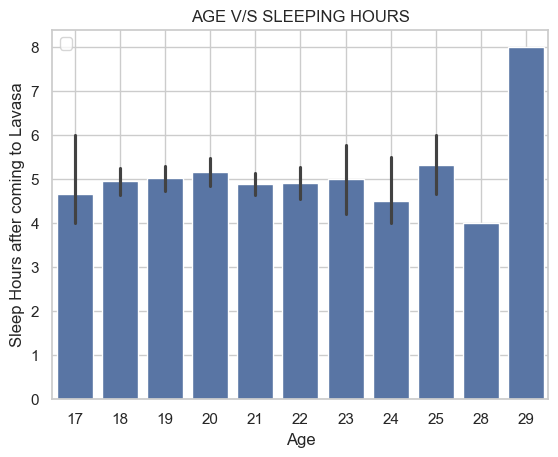

In [47]:
# sleep hours v/s age

ax = sns.barplot(x = df["Age"], y = df["sleep_hours_after_lavasa"])
ax.set_xlabel('Age')
ax.set_ylabel('Sleep Hours after coming to Lavasa')
ax.set_title('AGE V/S SLEEPING HOURS')
ax.legend()  # Display the legend based on the label

# Show the chart
plt.grid(True)  # Add grid lines (optional)
plt.show()

**GRAPH 2 : sleep hours before and after coming to Lavasa**

**INSIGHT: The sleeping hours of students are reduced drastically after coming to Lavasa.**

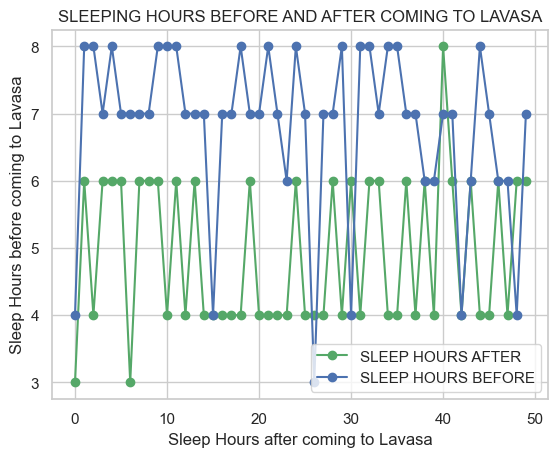

In [48]:
# sleep hours before and after coming to Lavasa

fig, ax = plt.subplots()

# Create a line chart
ax.plot(df["sleep_hours_after_lavasa"][0:50], marker='o', linestyle='-', color='g', label='SLEEP HOURS AFTER')
ax.plot(df["sleep_hours_before_lavasa"][0:50], marker='o', linestyle='-', color='b', label='SLEEP HOURS BEFORE')

# Customize the chart (optional)
ax.set_xlabel('Sleep Hours after coming to Lavasa')
ax.set_ylabel('Sleep Hours before coming to Lavasa')
ax.set_title('SLEEPING HOURS BEFORE AND AFTER COMING TO LAVASA')
ax.legend()  # Display the legend based on the label

# Show the chart
plt.grid(True)  # Add grid lines (optional)
plt.show()



**GRAPH 3: number of students from different courses**

**INSIGHT: The data mostly contains the population of Data Science students**

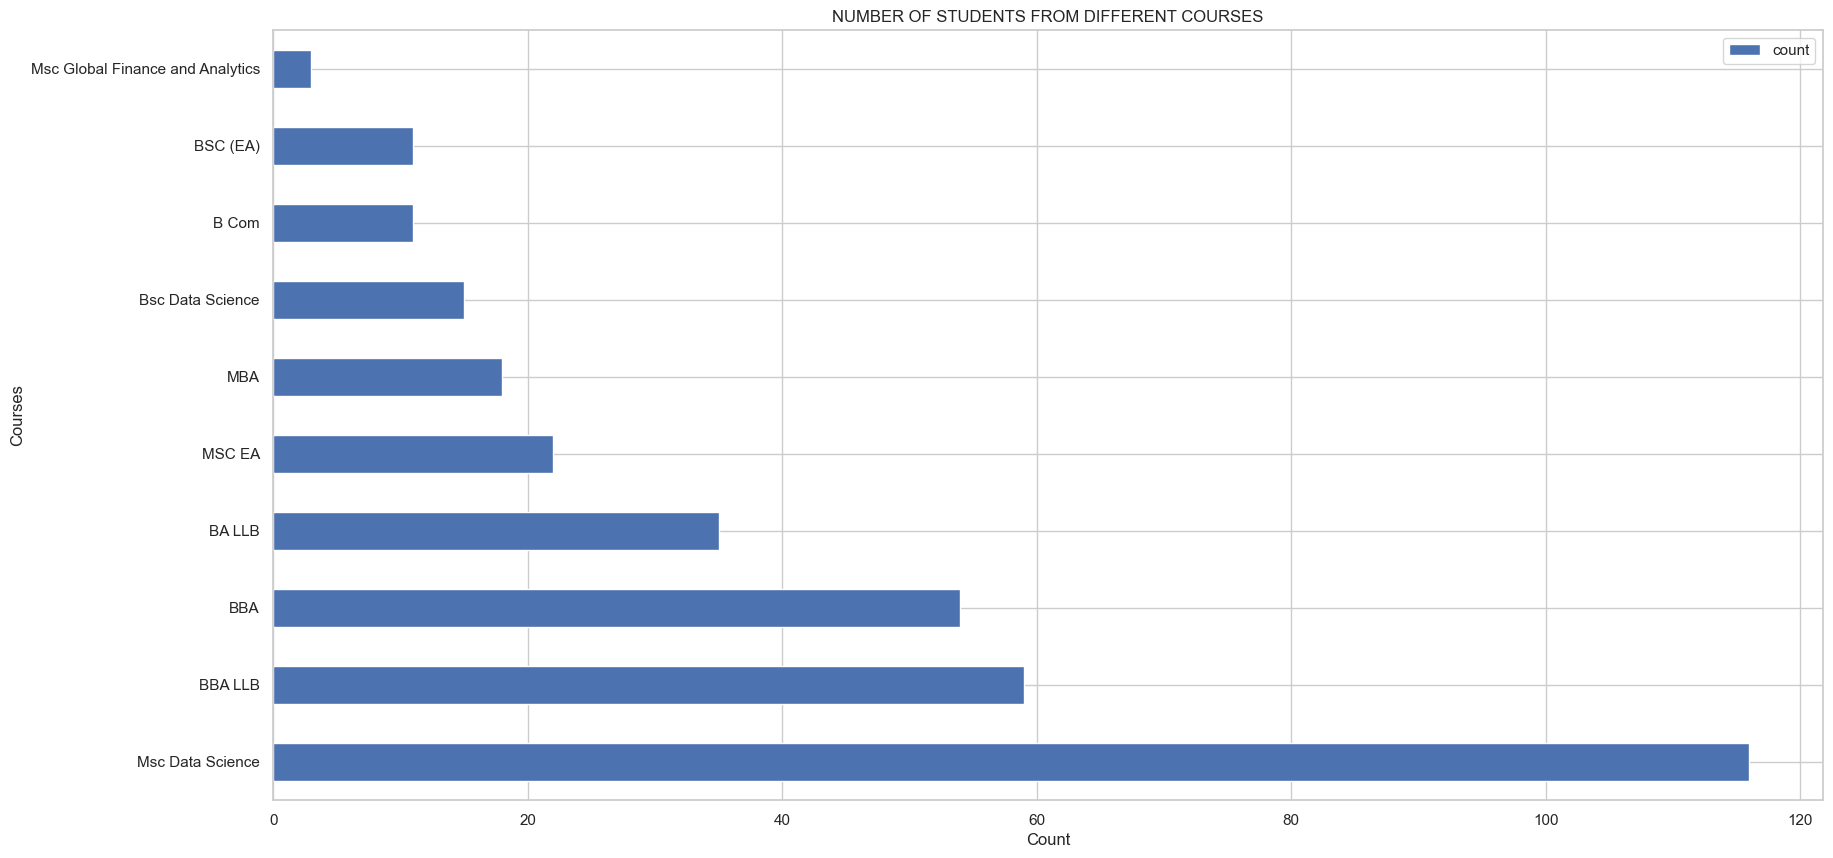

In [49]:
# number of students from different courses

ax = df['Department'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

ax.set_xlabel('Count')
ax.set_ylabel('Courses')
ax.set_title('NUMBER OF STUDENTS FROM DIFFERENT COURSES')
ax.legend()  # Display the legend based on the label

# Show the chart
plt.grid(True)  # Add grid lines (optional)
plt.show()

**GRAPH 4: time of leaving campus**

**INSIGHT: The students mostly leave the campus from 12 am to 2 am after availaing the campus's night facility.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


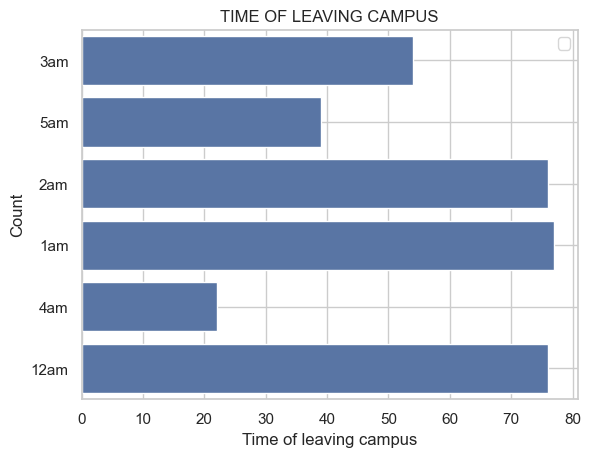

In [50]:
# time of leaving campus

ax = sns.countplot(df["time_leaving_campus"])

ax.set_xlabel('Time of leaving campus')
ax.set_ylabel('Count')
ax.set_title('TIME OF LEAVING CAMPUS')
ax.legend()  # Display the legend based on the label

# Show the chart
plt.grid(True)  # Add grid lines (optional)
plt.show()

**GRAPH 5: pairwise relationship between variable**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


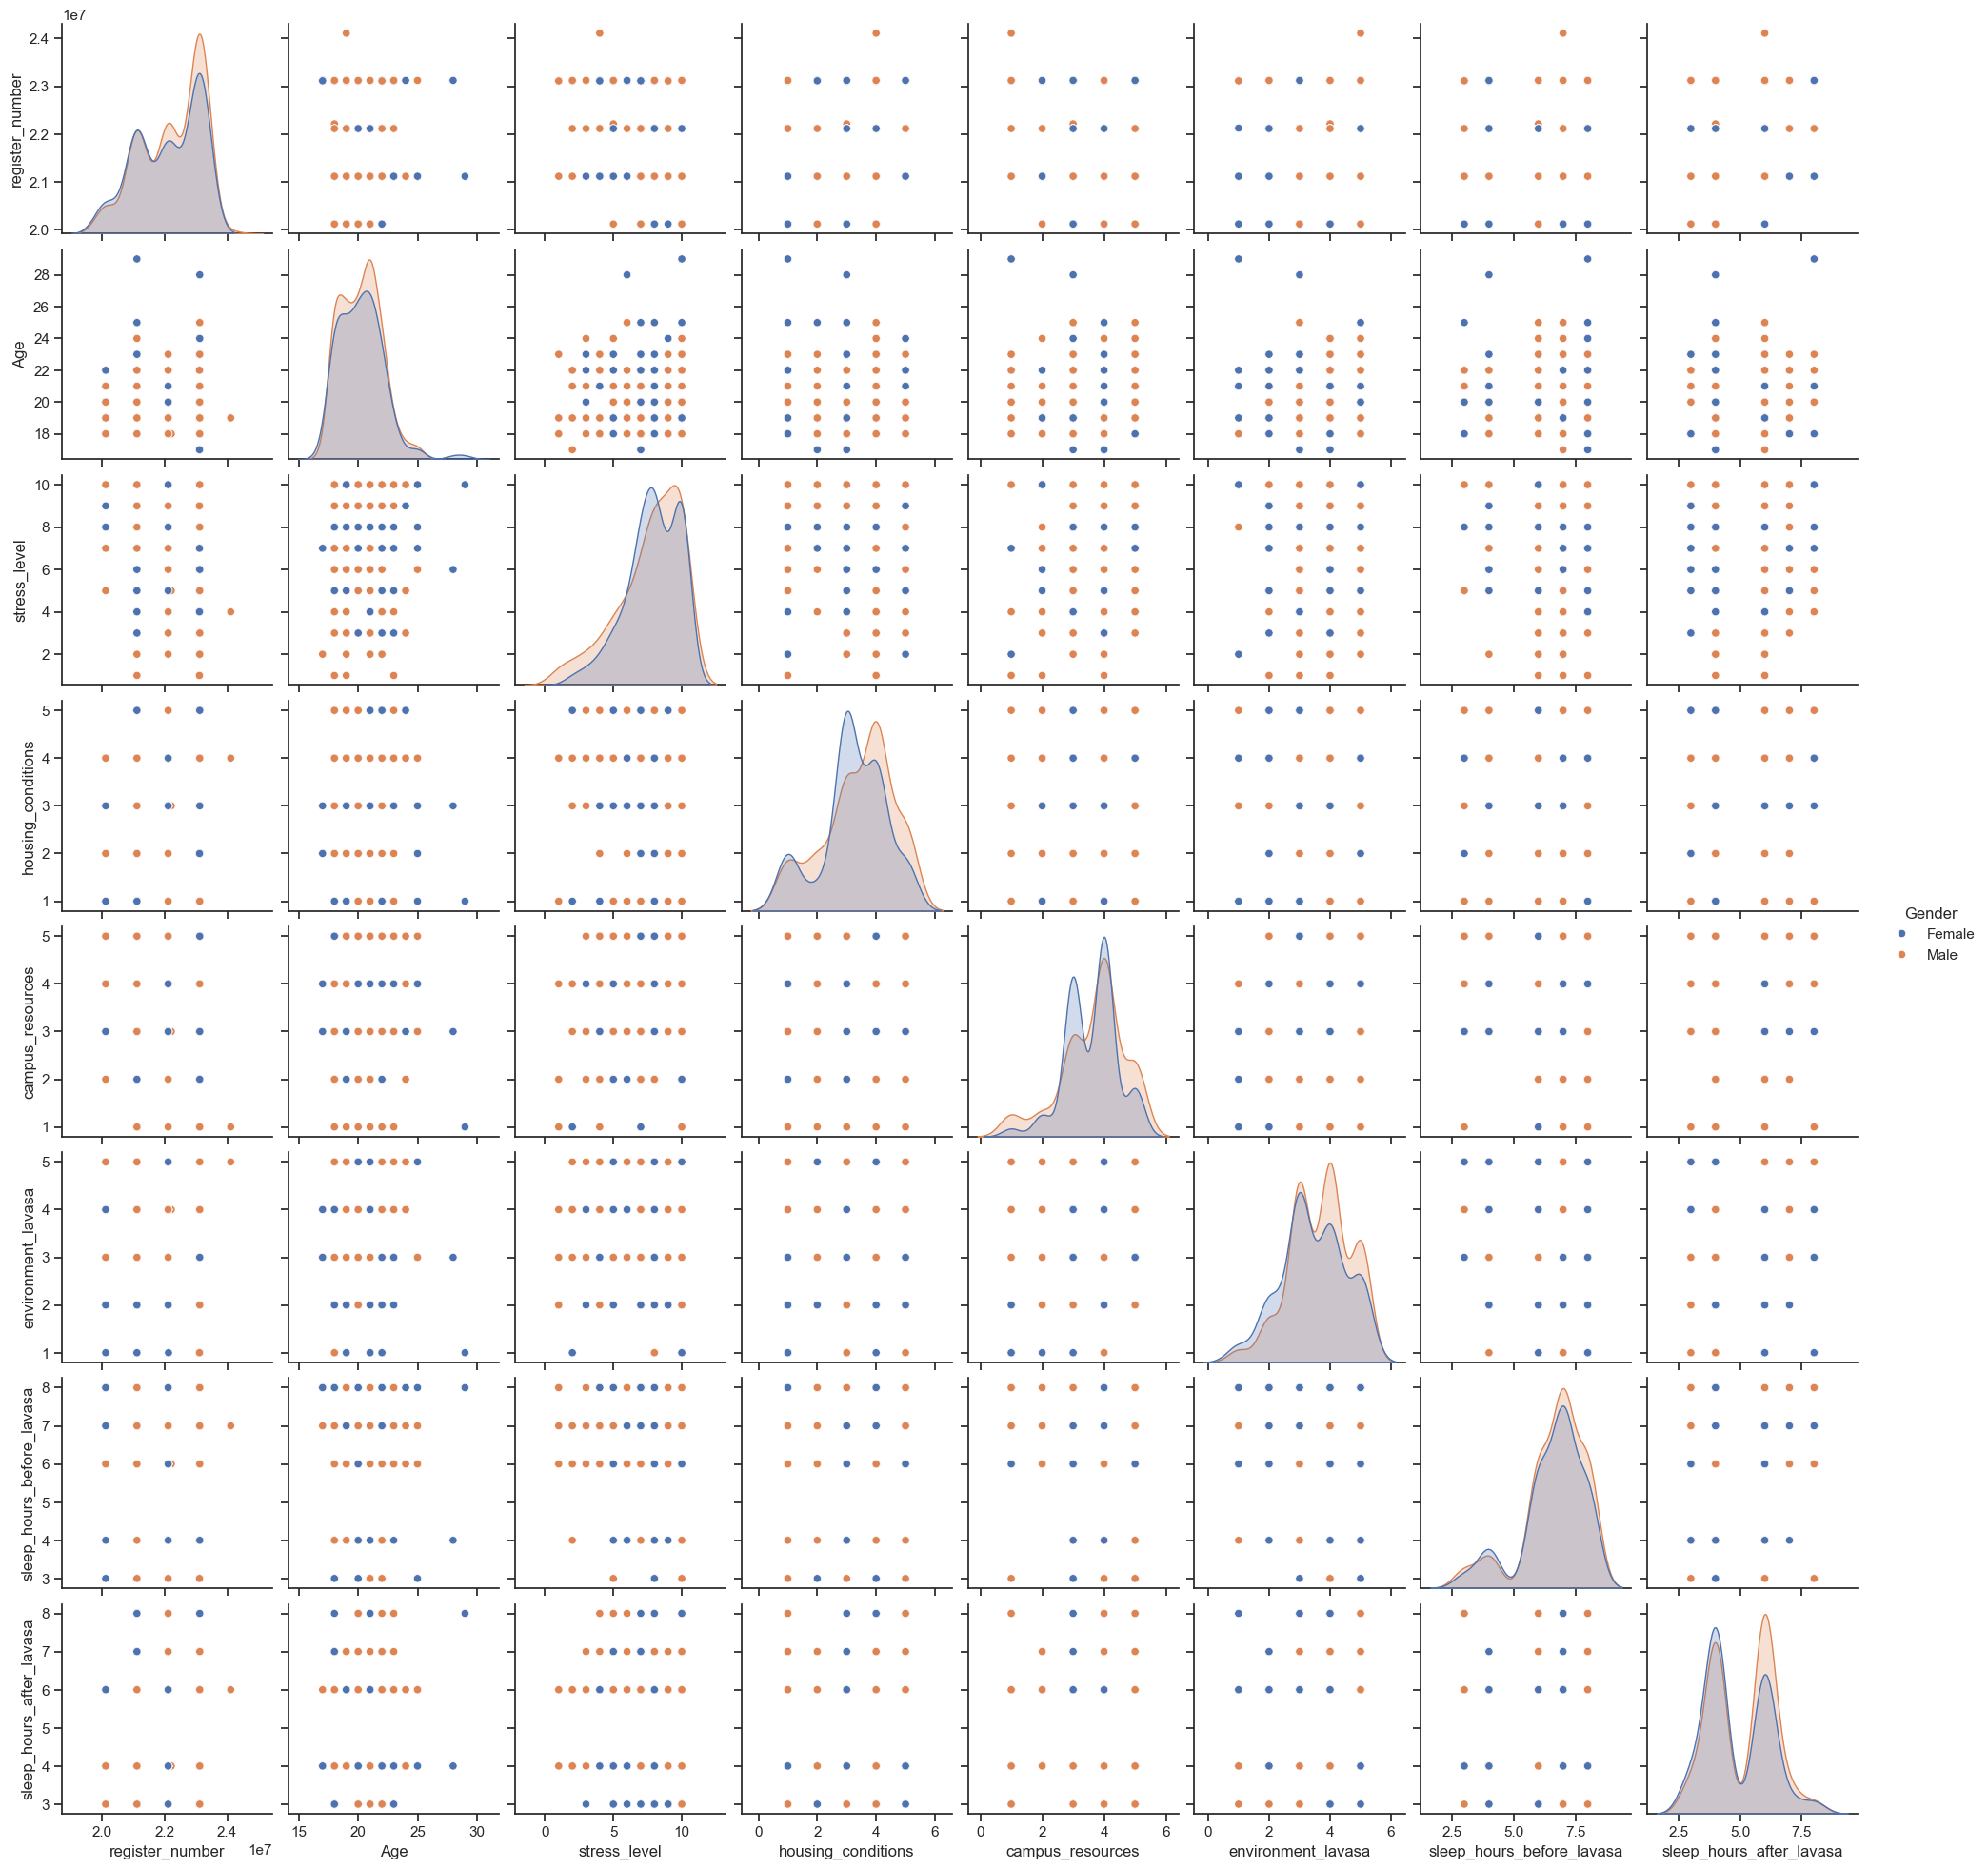

In [51]:
# shows the pairwise relationship between variable

sns.set_theme(style="ticks")
sns.pairplot(df, hue="Gender")

ax.set_title('PAIRWISE RELATION BETWEEN COLUMNS')
ax.legend()  # Display the legend based on the label

# Show the chart
plt.grid(True)  # Add grid lines (optional)
plt.show()

**GRAPH 6: sleep hours v/s stress level for male and female students**

**INSIGHTS: The sleep cycle of female students is mostly affected**

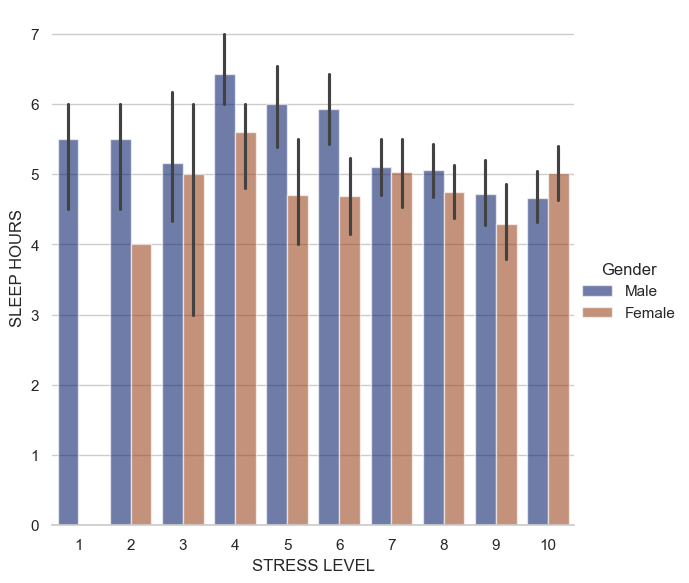

In [52]:
# sleep hours v/s stress level for male and female students

sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",
    x="stress_level", y="sleep_hours_after_lavasa", hue="Gender", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("STRESS LEVEL", "SLEEP HOURS")
g.legend.set_title("Gender")
g.set_titles("SLEEPING HOURS V/S STRESS LEVEL FOR MALES AND FEMALES")

**GRAPH 7: sleep hours v/s housing conditions**

**INSIGHTS: Housing Condition does not really affect the sleep cycle of students in Lavasa"**

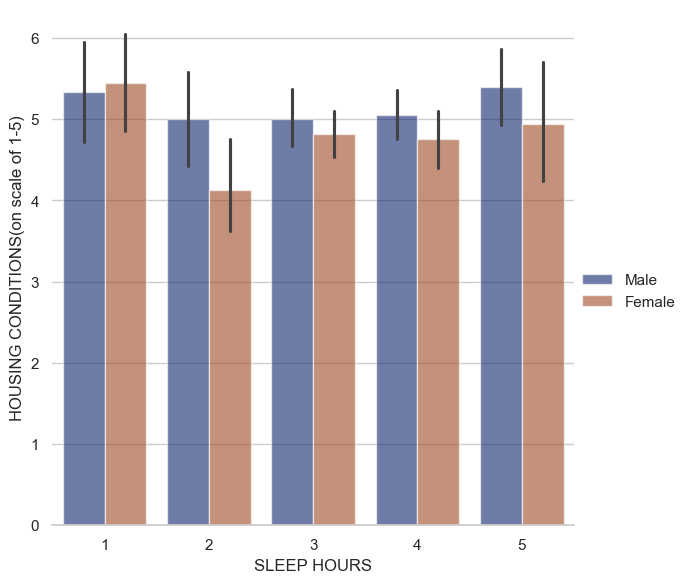

In [53]:
# sleep hours v/s housing conditions

sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="housing_conditions", y="sleep_hours_after_lavasa", hue="Gender", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("SLEEP HOURS", "HOUSING CONDITIONS(on scale of 1-5)")
g.legend.set_title("")

**GRAPH 8: stress level on a scale of 1-10**

**INSIGHTS: The stress level of students in Lavasa is mostly high"**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


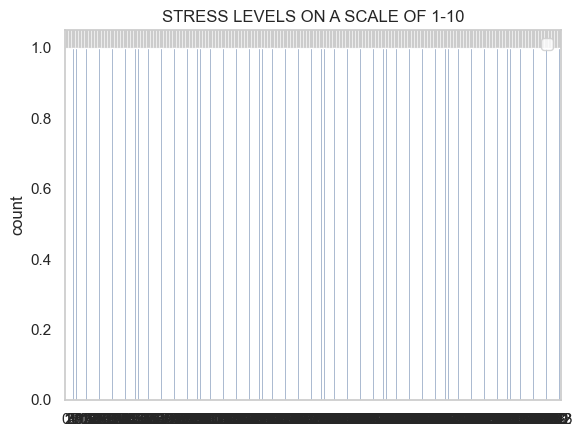

In [54]:
# stress level on a scale of 1-10

ax = sns.countplot(df["stress_level"])

ax.set_title('STRESS LEVELS ON A SCALE OF 1-10')
ax.legend()  # Display the legend based on the label

# Show the chart
plt.grid(True)  # Add grid lines (optional)
plt.show()

**GRAPH 9: Major stressors**

**INSIGHTS: The major reason of the stress level was found to be Academics"**

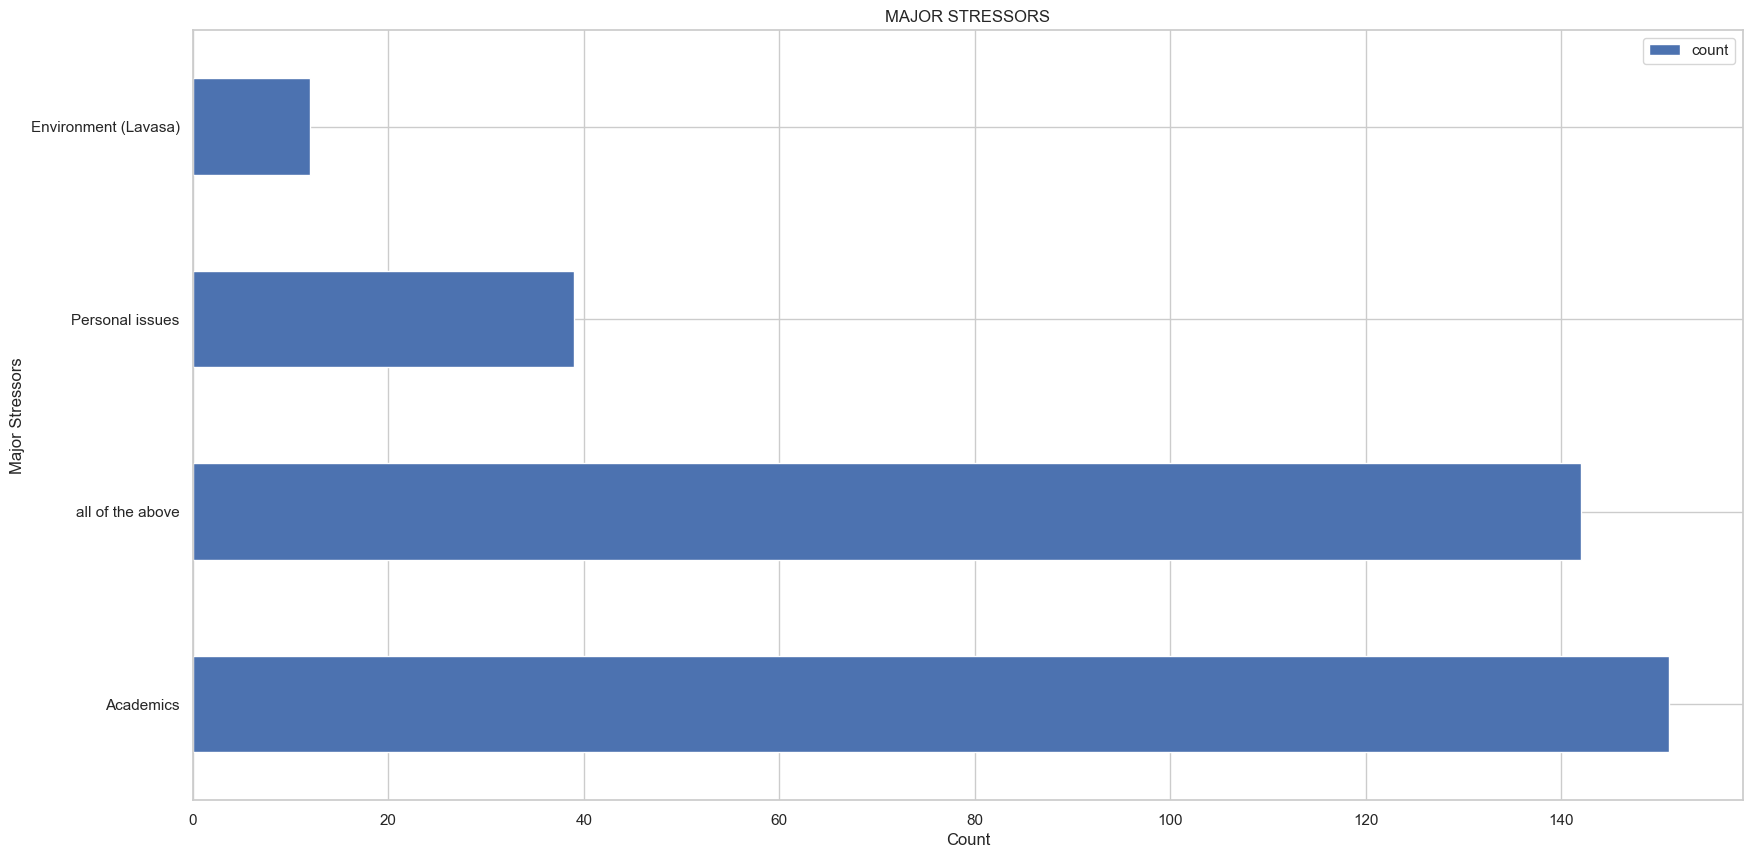

In [55]:
# major stressors

ax = df['major_stressors'].value_counts().head(30).plot(kind='barh', figsize=(20,10))
ax.set_xlabel('Count')
ax.set_ylabel('Major Stressors')
ax.set_title('MAJOR STRESSORS')
ax.legend()  # Display the legend based on the label

# Show the chart
plt.grid(True)  # Add grid lines (optional)
plt.show()

**GRAPH 10: time of leaving campus**

**INSIGHTS: Almost around 40% of students we leave the campus from 3 am to 5am based on the data"**

/var/folders/4s/469p4rwd60xgtx_fjxkh_5940000gn/T/ipykernel_22945/3227251115.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_3am = df[df["time_leaving_campus"] == "3am"].count()[0]
/var/folders/4s/469p4rwd60xgtx_fjxkh_5940000gn/T/ipykernel_22945/3227251115.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_5am = df[df["time_leaving_campus"] == "5am"].count()[0]
/var/folders/4s/469p4rwd60xgtx_fjxkh_5940000gn/T/ipykernel_22945/3227251115.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with D

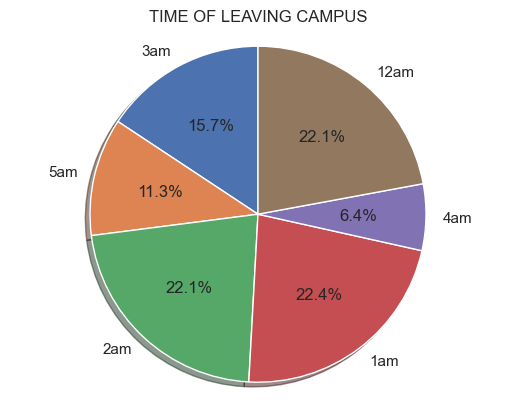

In [56]:
# percentage of students for time of leaving campus

labels = []

for i in df["time_leaving_campus"].unique():
    labels.append(i)
    
count_3am = df[df["time_leaving_campus"] == "3am"].count()[0]
count_5am = df[df["time_leaving_campus"] == "5am"].count()[0]
count_2am = df[df["time_leaving_campus"] == "2am"].count()[0]
count_1am = df[df["time_leaving_campus"] == "1am"].count()[0]
count_4am = df[df["time_leaving_campus"] == "4am"].count()[0]
count_12am = df[df["time_leaving_campus"] == "12am"].count()[0]

sizes = [count_3am,count_5am,count_2am,count_1am,count_4am,count_12am]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a pie chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)

# Customize the chart (optional)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('TIME OF LEAVING CAMPUS')

# Show the chart
plt.show()

#### **CORRELATION MATRIX**

**showing correlation between different columns**

**GRAPH 11: stress level on a scale of 1-10**

**INSIGHTS: Create a heatmap of the correlation"**

In [57]:
correlation_matrix = df.corr()

ValueError: could not convert string to float: 'parul3kin@gmail.com'

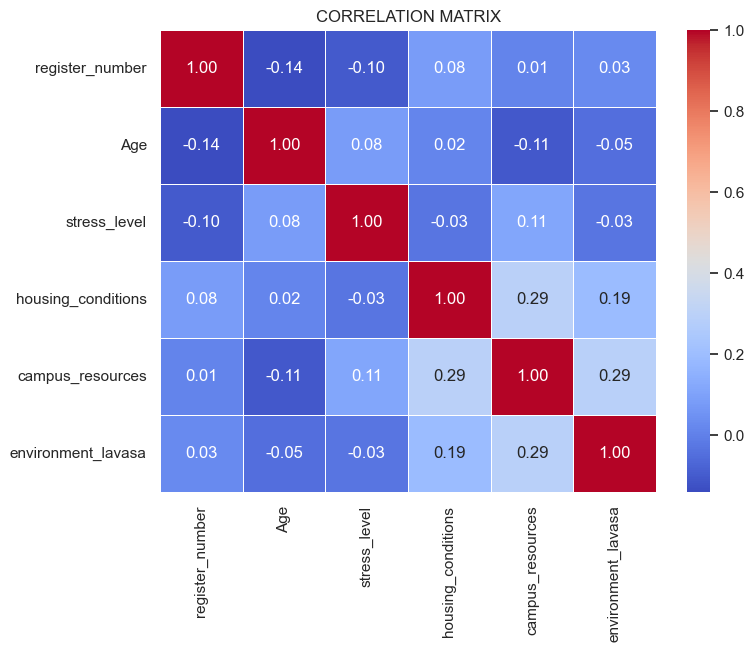

In [ ]:
# Create a heatmap of the correlation 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('CORRELATION MATRIX')
plt.show()